# This a notebook for the collisions part of the code. 
This will also create figures for Indigo's final thesis on collisions.

In [32]:
from utils.collisions.NASA_SBM_frags import frag_col_SBM_vec_lc2
import numpy as np
import math


m1 = 1250.0
m2 = 6
r1 = 4
r2 = 0.11

SS = 20

p1_in = np.array([
    10.0,  # mass in kg
    4.0,     # radius in meters
    2801.6,  # r_x in km, 1000 km
    2728.5,  # r_y in km
    6215.4,  # r_z in km
    -5.5326,    # v_x in km/s
    -3.0152,    # v_y in km/s
    3.8286,     # v_z in km/s
    1      # object_class (dimensionless)
])

p2_in = np.array([
    6.0,         # mass in kg
    0.1,         # radius in meters
    2872.4,  # r_x in km
    2743.1,  # r_y in km
    6224.8,  # r_z in km
    3.2,         # v_x in km/s
    5.4,         # v_y in km/s
    -3.9,        # v_z in km/s
    1.0          # object_class (dimensionless)
])


param = {
    'req': 6.3781e+03,
    'mu': 3.9860e+05,
    'j2': 0.0011,
    'max_frag': float('inf'),  # Inf in MATLAB translates to float('inf') in Python
    'maxID': 0,
    'density_profile': 'static'
}

# # altitude = scen_properties.HMid[collision_index]
# altitude = 1000 
# earth_radius = 6371  # Earth's mean radius in km
# latitude_deg = 45  # in degrees
# longitude_deg = 60  # in degrees

# # Convert degrees to radians
# latitude_rad = math.radians(latitude_deg)
# longitude_rad = math.radians(longitude_deg)

# # Compute the radial distance from Earth's center
# r = earth_radius + altitude

# # Calculate the position vector in ECEF coordinates
# x = r * math.cos(latitude_rad) * math.cos(longitude_rad)
# y = r * math.cos(latitude_rad) * math.sin(longitude_rad)
# z = r * math.sin(latitude_rad)

# # Return the position vector
# x, y, z

# # up to correct mass too
if m1 < m2:
    m1, m2 = m2, m1
    r1, r2 = r2, r1

p1_in[0], p2_in[0] = m1, m2 
p1_in[1], p2_in[1] = r1, r2

# # remove a from r_x from both p1_in and p2_in
# # the initial norm is 1000, so we need to remove the difference
# p1_in[2], p1_in[3], p1_in[4] = x, y, z 
# p2_in[2], p2_in[3], p2_in[4] = x, y, z
    
LB = 0.01 # Lower boundary cut off for fragment size

debris1, debris2, isCatastrophic = frag_col_SBM_vec_lc2(0, p1_in, p2_in, param, LB, minimum_altitude=100+6378)

In [33]:
print(len(debris1), len(debris2), isCatastrophic)

52996 715 True


In [34]:
frag_a = []
frag_e = []
frag_mass = []

for debris in debris1:
    norm_earth_radius = debris[0]
    if norm_earth_radius < 1:
        continue  # decayed

    frag_a.append(debris[0]-6371)
    # frag_a.append(debris[0])
    frag_e.append(debris[1])
    frag_mass.append(debris[7])

In [35]:
np.mean(frag_a)

989.4179929753187

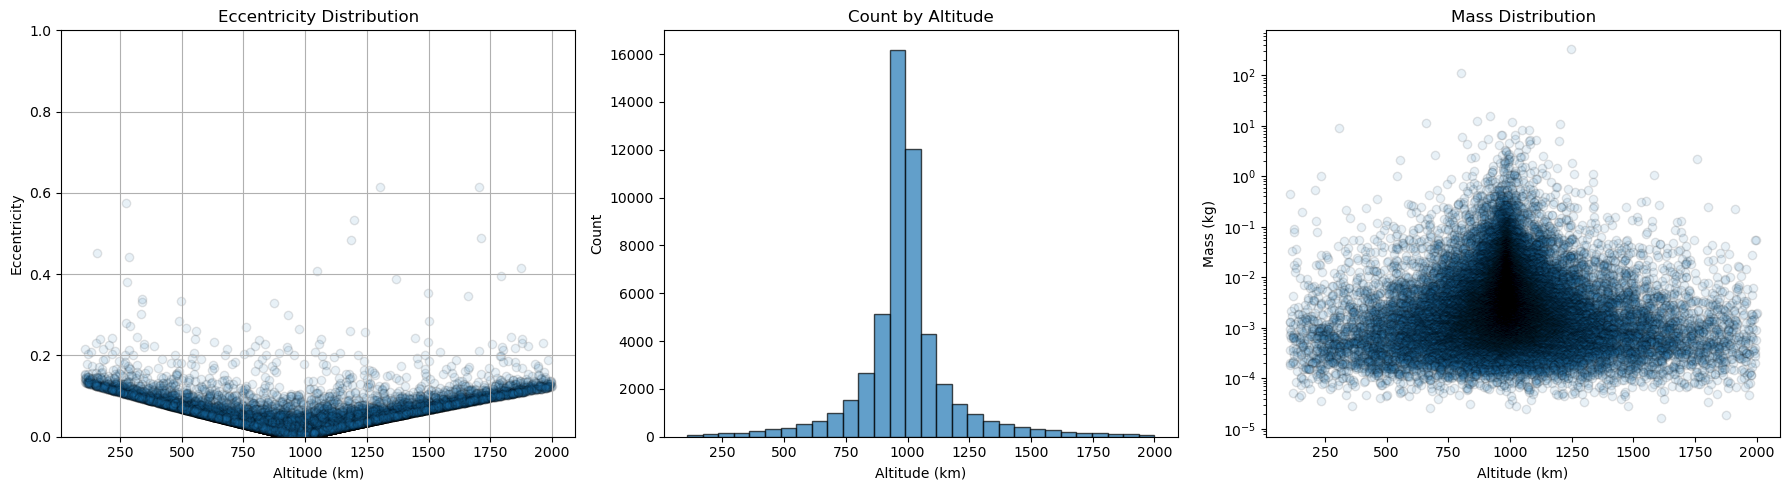

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Scatter plot: Semi-major axis vs Eccentricity, size represents mass
axes[0].scatter(frag_a, frag_e, alpha=0.1, edgecolors="k")
axes[0].set_xlabel("Altitude (km)")
axes[0].set_ylabel("Eccentricity")
axes[0].set_title("Eccentricity Distribution")
axes[0].set_ylim(0,1)
axes[0].grid(True)

# Histogram: Count of debris by semi-major axis
axes[1].hist(frag_a, bins=30, edgecolor="black", alpha=0.7)
axes[1].set_xlabel("Altitude (km)")
axes[1].set_ylabel("Count")
axes[1].set_title("Count by Altitude")

# Histogram: Eccentricity distribution
# axes[2].hist(frag_mass, bins=1, edgecolor="black", alpha=0.7, color="green")
# Scatter Mass vs Altitude
axes[2].scatter( frag_a, frag_mass, alpha=0.1, edgecolors="k")
# axes[2].hist(frag_mass, bins=30, edgecolor="black", alpha=0.7, color="green")
axes[2].set_yscale("log")
axes[2].set_xlabel("Altitude (km)")
axes[2].set_ylabel("Mass (kg)")
axes[2].set_title("Mass Distribution")

plt.tight_layout()
plt.show()

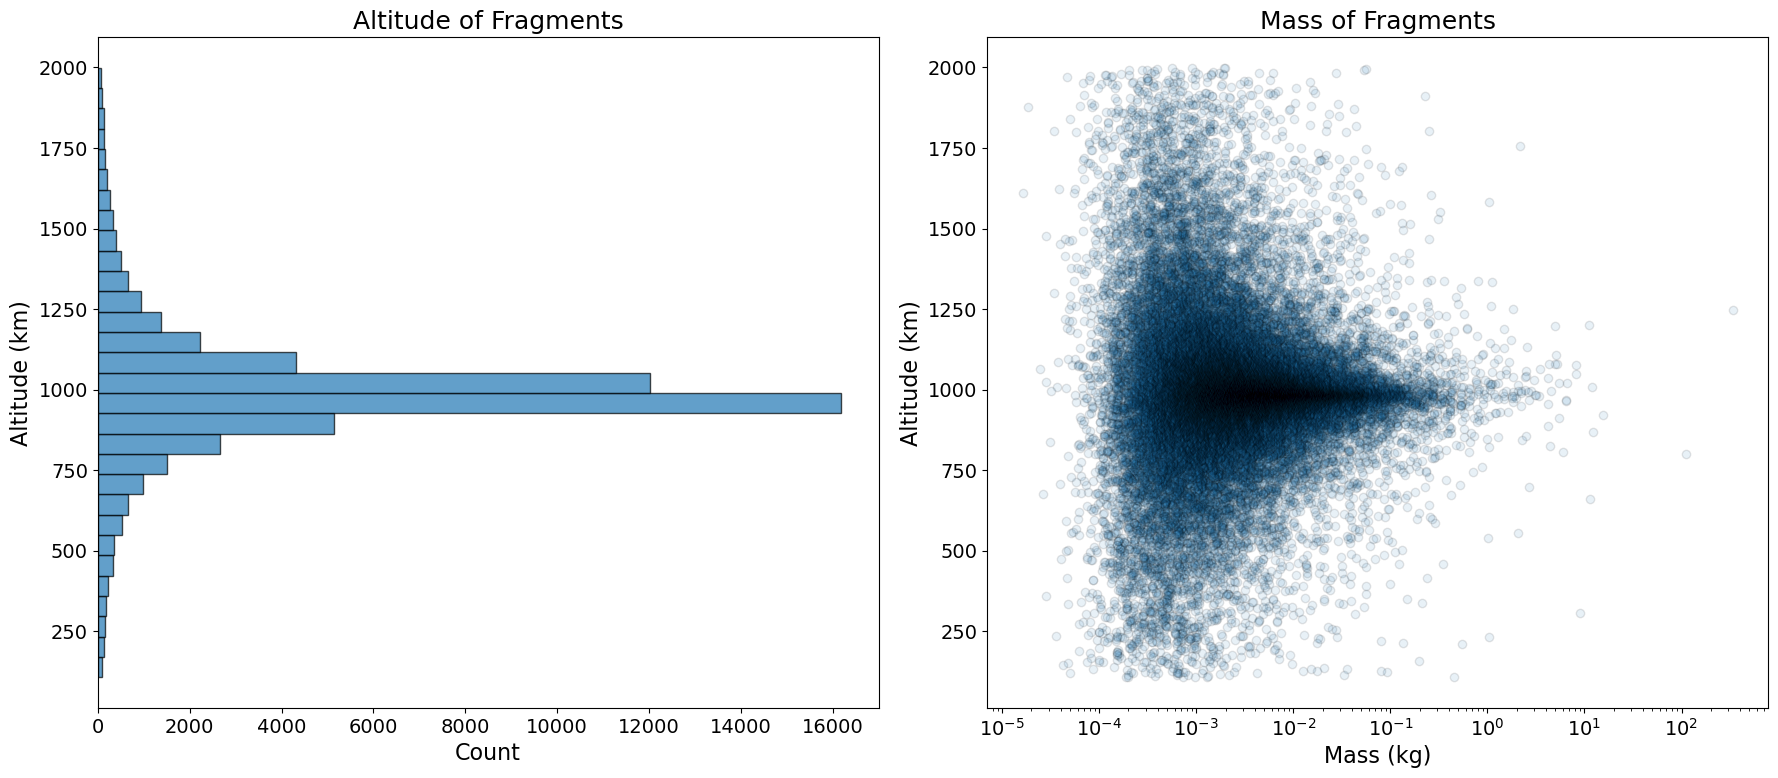

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

plt.rcParams.update({'font.size': 14})

axes[0].hist(frag_a, bins=30, edgecolor="black", alpha=0.7, orientation='horizontal')
axes[0].set_ylabel("Altitude (km)", fontsize=16)
axes[0].set_xlabel("Count", fontsize=16)
axes[0].set_title("Altitude of Fragments", fontsize=18)

# Scatter plot: Mass vs Altitude (Altitude on y-axis)
axes[1].scatter(frag_mass, frag_a, alpha=0.1, edgecolors="k")
axes[1].set_xscale("log")
axes[1].set_ylabel("Altitude (km)", fontsize=16)
axes[1].set_xlabel("Mass (kg)", fontsize=16)
axes[1].set_title("Mass of Fragments", fontsize=18)

# Adjust tick parameters for larger text
axes[0].tick_params(axis='both', which='major', labelsize=14)
axes[1].tick_params(axis='both', which='major', labelsize=14)

plt.tight_layout()
plt.show()

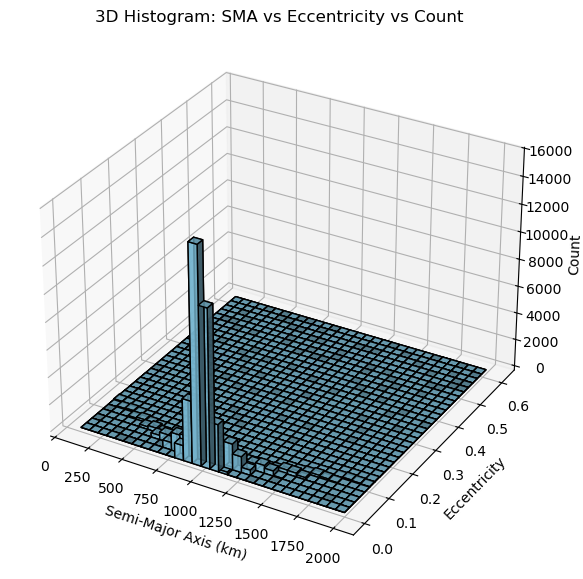

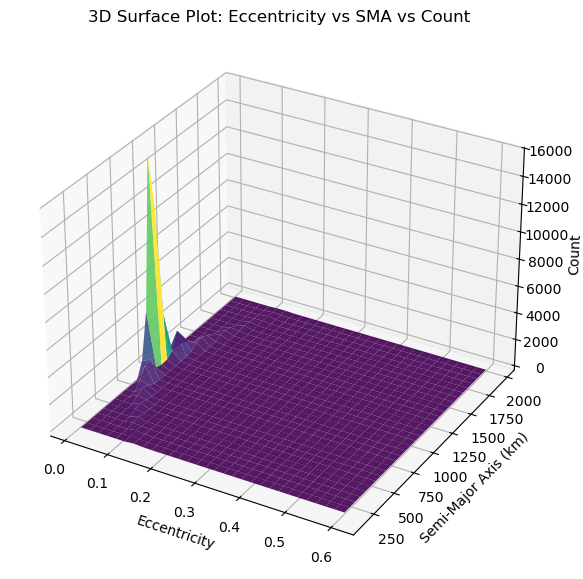

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # required for 3D plotting


# Create a 2D histogram. You can adjust the number of bins as needed.
bins_sma = 30
bins_ecc = 30
hist, sma_edges, ecc_edges = np.histogram2d(frag_a, frag_e, bins=[bins_sma, bins_ecc])

# Meshgrid for bar positions (we use the bin edges for x and y)
# Note: indexing='ij' ensures that the first axis corresponds to SMA.
xpos, ypos = np.meshgrid(sma_edges[:-1], ecc_edges[:-1], indexing='ij')
xpos = xpos.ravel()
ypos = ypos.ravel()

# The z position for the bottom of the bars will be 0
zpos = np.zeros_like(xpos)

# The width (dx) and depth (dy) of the bars are the bin widths:
dx = (sma_edges[1] - sma_edges[0]) * np.ones_like(xpos)
dy = (ecc_edges[1] - ecc_edges[0]) * np.ones_like(ypos)

# The height (dz) of each bar is given by the 2D histogram values:
dz = hist.ravel()

# Create the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D bar plot
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, shade=True, color='skyblue', edgecolor='k', alpha=0.8)

# Label axes
ax.set_xlabel('Semi-Major Axis (km)')
ax.set_ylabel('Eccentricity')
ax.set_zlabel('Count')
ax.set_title('3D Histogram: SMA vs Eccentricity vs Count')

plt.show()

# Compute 2D histogram
hist, sma_edges, ecc_edges = np.histogram2d(frag_a, frag_e, bins=[bins_sma, bins_ecc])

# Compute the midpoints of bins for plotting the surface
sma_centers = (sma_edges[:-1] + sma_edges[1:]) / 2
ecc_centers = (ecc_edges[:-1] + ecc_edges[1:]) / 2

# Swap the X and Y axes
Y, X = np.meshgrid(sma_centers, ecc_centers, indexing='ij')

# Create the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface with swapped axes
ax.plot_surface(X, Y, hist, cmap='viridis', edgecolor='none', alpha=0.9)

# Label axes with swapped positions
ax.set_xlabel('Eccentricity')  # Now on the main x-axis
ax.set_ylabel('Semi-Major Axis (km)')  # Now on the opposite side
ax.set_zlabel('Count')
ax.set_title('3D Surface Plot: Eccentricity vs SMA vs Count')

# Show plot
plt.show()

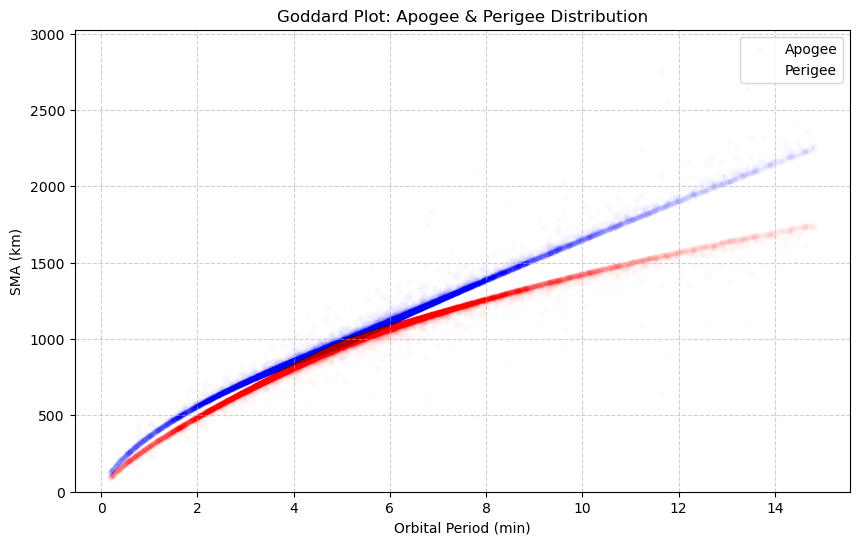

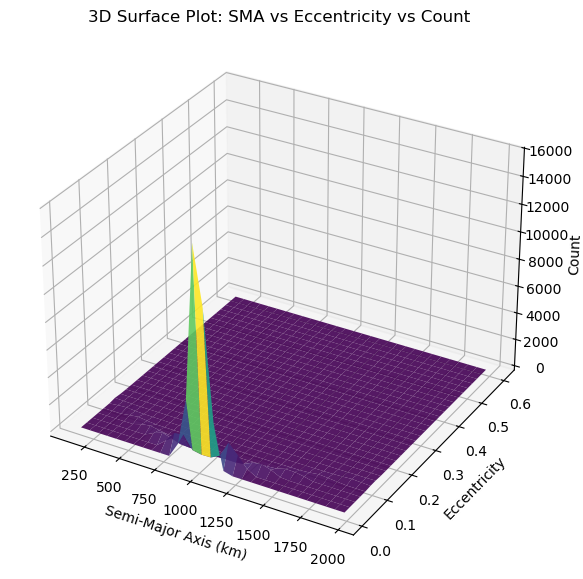

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Constants
R_EARTH = 6371  # Earth's radius in km
MU = 398600  # Earth's gravitational parameter in km³/s²

# Convert lists to NumPy arrays for calculations
a = np.array(frag_a)  # Convert to absolute semi-major axis if needed
e = np.array(frag_e)  # Eccentricity

# Calculate Apogee and Perigee (relative to Earth's surface)
apogee = a * (1 + e)
perigee = a * (1 - e)

# Calculate Orbital Period in minutes
T = 2 * np.pi * np.sqrt(a**3 / MU) / 60  # Convert to minutes

# Create figure
plt.figure(figsize=(10, 6))

# Scatter plot for Apogee and Perigee
plt.scatter(T, apogee, color='blue', label='Apogee', alpha=0.01, s=10)
plt.scatter(T, perigee, color='red', label='Perigee', alpha=0.01, s=10)

# Labels and legend
plt.xlabel("Orbital Period (min)")
plt.ylabel("SMA (km)")
plt.title("Goddard Plot: Apogee & Perigee Distribution")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.ylim(0, max(apogee.max(), perigee.max()) * 1.1)

plt.show()

hist, sma_edges, ecc_edges = np.histogram2d(frag_a, frag_e, bins=[bins_sma, bins_ecc])

# Compute the midpoints of bins for plotting the surface
sma_centers = (sma_edges[:-1] + sma_edges[1:]) / 2
ecc_centers = (ecc_edges[:-1] + ecc_edges[1:]) / 2
X, Y = np.meshgrid(sma_centers, ecc_centers, indexing='ij')

# Create the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, hist, cmap='viridis', edgecolor='none', alpha=0.9)

# Label axes
ax.set_xlabel('Semi-Major Axis (km)')
ax.set_ylabel('Eccentricity')
ax.set_zlabel('Count')
ax.set_title('3D Surface Plot: SMA vs Eccentricity vs Count')

# Show plot
plt.show()

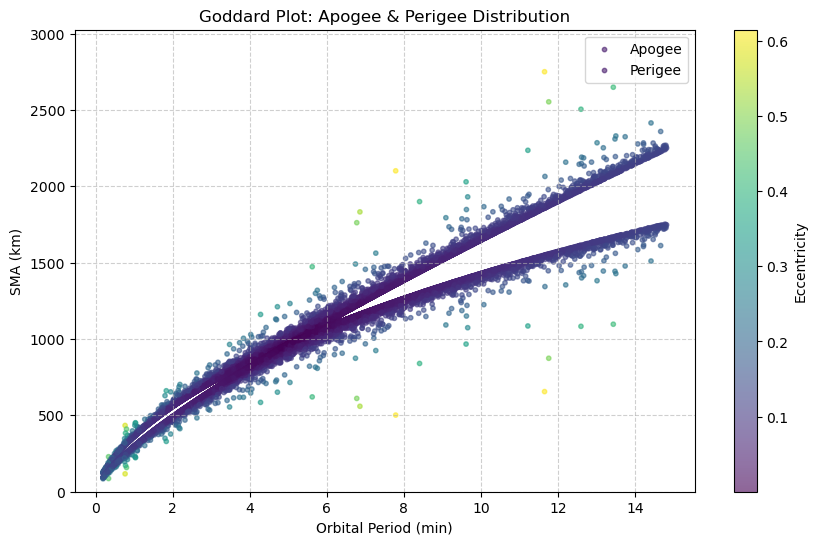

In [40]:
a = np.array(frag_a)  # Convert to absolute semi-major axis if needed
e = np.array(frag_e)  # Eccentricity

# Calculate Apogee and Perigee (relative to Earth's surface)
apogee = a * (1 + e)
perigee = a * (1 - e)

# Calculate Orbital Period in minutes
T = 2 * np.pi * np.sqrt(a**3 / MU) / 60  # Convert to minutes

# Create figure
plt.figure(figsize=(10, 6))

# Scatter plot for Apogee and Perigee with color scale based on eccentricity
sc = plt.scatter(T, apogee, c=e, cmap='viridis', label='Apogee', alpha=0.6, s=10)
plt.scatter(T, perigee, c=e, cmap='viridis', label='Perigee', alpha=0.6, s=10)

# Add color bar
cbar = plt.colorbar(sc)
cbar.set_label('Eccentricity')

# Labels and legend
plt.xlabel("Orbital Period (min)")
plt.ylabel("SMA (km)")
plt.title("Goddard Plot: Apogee & Perigee Distribution")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.ylim(0, max(apogee.max(), perigee.max()) * 1.1)

plt.show()

# Adjusting the r and v vector

In [41]:
import numpy as np

# Earth radius in km
R_EARTH = 6378.1  

# Function to adjust position to new altitude
def adjust_altitude(p, altitude):
    r_vec = p[2:5]  # Extract position vector (r_x, r_y, r_z)
    r_current = np.linalg.norm(r_vec)  # Compute current radius
    r_new = R_EARTH + altitude  # New radius based on altitude
    scale_factor = r_new / r_current  # Scaling factor
    
    # Scale the position vector
    p_new = p.copy()  # Copy the original object
    p_new[2:5] = scale_factor * r_vec  # Adjust position
    
    return p_new

# Define different altitudes
altitudes = [800, 900, 1000, 1100]  # Altitudes in km

# Generate new positions for different altitudes
for alt in altitudes:
    p1_new = adjust_altitude(p1_in, alt)
    p2_new = adjust_altitude(p2_in, alt)
    print(f"Altitude: {alt} km")
    print(f"  p1 position: {p1_new[2:5]}")
    print(f"  p2 position: {p2_new[2:5]}\n")


Altitude: 800 km
  p1 position: [2738.55250404 2667.09755399 6075.527996  ]
  p2 position: [2792.30529574 2666.61072857 6051.22615406]

Altitude: 900 km
  p1 position: [2776.70399961 2704.25359186 6160.16777527]
  p2 position: [2831.20563561 2703.75998434 6135.52737798]

Altitude: 1000 km
  p1 position: [2814.85549519 2741.40962972 6244.80755454]
  p2 position: [2870.10597547 2740.90924012 6219.8286019 ]

Altitude: 1100 km
  p1 position: [2853.00699077 2778.56566759 6329.44733382]
  p2 position: [2909.00631533 2778.05849589 6304.12982582]

